https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3

https://github.com/SamKirkiles/vgg-cifar100

https://github.com/geifmany/cifar-vgg

In [ ]:
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras import models, layers
import tensorflow.keras.backend as K
import tensorflow.keras
import os

In [ ]:
# 设置
batch_size = 500
num_classes = 100
epochs = 700
data_augmentation = False
num_predictions = 20

In [ ]:
# 导入数据
# (x_train, y_train), (x_test, y_test) = cifar100.load_data()
from six.moves import cPickle
def load_cifar100_my(path):
    with open(os.path.join(os.getcwd(),path), 'rb') as f:
        d = cPickle.load(f, encoding='bytes')
        d_decoded = {}
        for k, v in d.items():
            d_decoded[k.decode('utf8')] = v
            d = d_decoded
        data = d['data']
        labels = d['fine_labels']
        data = data.reshape(data.shape[0], 3, 32, 32)
        data = data.transpose(0,2,3,1)
    return data, labels
x_train, y_train = load_cifar100_my(r'data\cifar-100-python\train')
x_test , y_test  = load_cifar100_my(r'data\cifar-100-python\test')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 数据预处理
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# Convert class vectors to binary class matrices.
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

# x_train = x_train.astype('float16')
# x_test  = x_test.astype('float16')
# y_train = y_train.astype('float16')
# y_test  = y_test.astype('float16')


In [ ]:
print(y_train.shape)
print(y_train.dtype)
print(x_train.shape[1:])

In [ ]:
# 查看数据
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.imshow(x_train[101])
plt.axis('off')
plt.show()

In [ ]:
# inputs = Input(shape=x_train.shape[1:], name='inputs')
# x = Conv2D(32, (3,3), padding='same', activation='relu')(inputs)
# x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
# x = MaxPooling2D((2,2))(x)
# x = Dropout(0.25, seed=42)(x)
# x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
# x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
# x = MaxPooling2D((2,2))(x)
# x = Dropout(0.25, seed=42)(x)
# x = Flatten()(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.5, seed=42)(x)
# # x = keras.layers.Add()([x,x])
# prediction = Dense(num_classes, activation='softmax')(x)
# model = Model(inputs=inputs, outputs=prediction)

In [ ]:
img_input = layers.Input(shape=x_train.shape[1:], name='inputs')
# Block 1
# Layer1 - 64 channels
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
# Layer2 - 64 channels
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
x = layers.Dropout(0.5)(x)

# Block 2
# Layer 3 - 128 channels
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
# Layer 4 - 128 channels
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
x = layers.Dropout(0.5)(x)

# Block 3
# Layer 5 - 256 channels
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
# Layer 6 - 256 channels
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
# Layer 7 - 256 channels
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)
x = layers.Dropout(0.5)(x)

# Block 4
# Layer 8 - 512 channels
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
# Layer 9 - 512 channels
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
# Layer 10 - 512 channels
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)
x = layers.Dropout(0.5)(x)

# Block 5
# Layer 11 - 512 channels
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
# Layer 12 - 512 channels
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
# Layer 13 - 512 channels
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
x = layers.Dropout(0.5)(x)

x = layers.Flatten(name='flatten')(x)
x = layers.Dense(4096, activation='relu', name='fc1')(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation='relu', name='fc2')(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(num_classes, activation='softmax', name='predictions')(x)

model = models.Model(img_input, x, name='vgg16')


In [ ]:
# Custom loss and metrics
# 如果是多分类多标签呢？
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def margin_loss(y_true, y_pred):
    lamb, margin = 0.5, 0.1
    return K.sum(y_true * K.square(K.relu(1 - margin - y_pred)) + lamb * (
        1 - y_true) * K.square(K.relu(y_pred - margin)), axis=-1)

In [ ]:
# loss, optimizer, metrics

loss       = tensorflow.keras.losses.categorical_crossentropy
# loss       = tensorflow.keras.losses.mean_squared_error

# optimizer  = tensorflow.keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
optimizer  = tensorflow.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

metrics    = [tensorflow.keras.metrics.categorical_accuracy]
# metrics    = [tensorflow.keras.metrics.categorical_accuracy, tensorflow.keras.metrics.mae]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
model_record = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(x_test, y_test),
                      shuffle=True)

In [17]:
# 保存训练记录
import pickle
model_record_path = os.path.join(os.getcwd(), 'saved_models/model_fit_history')
with open(model_record_path, 'wb') as f:
    pickle.dump(model_record.history, f)
with open(model_record_path, 'rb') as f:
    print(pickle.load(f))

NameError: name 'model_record' is not defined

In [18]:
model_record.history.keys()

NameError: name 'model_record' is not defined

NameError: name 'model_record' is not defined

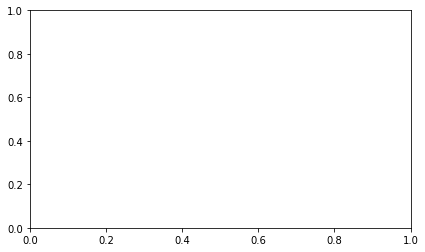

In [19]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(model_record.history['loss'],'r')
plt.plot(model_record.history['val_loss'],'g')
plt.subplot(1,2,2)
plt.plot(model_record.history['categorical_accuracy'],'r')
plt.plot(model_record.history['val_categorical_accuracy'],'g')
plt.show()


In [10]:
# 模型保存路径设置
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'vgg16_keras_cifar100.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)

In [ ]:
# 保存模型
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [ ]:
# 读取模型
# model = keras.models.load_model(model_path)

In [ ]:
[i.shape for i in model.get_weights()]

In [ ]:
model.summary()

### 所有的模型都可调用，就像网络层一样所有的模型都可调用，就像网络层一样

利用函数式 API，可以轻易地重用训练好的模型，在调用模型时，您不仅重用模型的结构，还重用了它的权重。
这种方式能允许我们快速创建可以处理序列输入的模型。只需一行代码，你就将图像分类模型转换为视频分类模型。

In [2]:
from keras.layers import TimeDistributed

# 输入张量是 20 个时间步的序列，每一个时间为一个 784 维的向量
input_sequences = Input(shape=(20, 784))

# 这部分将我们之前定义的模型应用于输入序列中的每个时间步。
# 之前定义的模型的输出是一个 10-way softmax，
# 因而下面的层的输出将是维度为 10 的 20 个向量的序列。
processed_sequences = TimeDistributed(model)(input_sequences)

NameError: name 'model' is not defined

### 多输入多输出模型



In [11]:
import torchvision.datasets

In [17]:
torchvision.datasets.CIFAR100(r'd:\sync-cs\bluoveGitHub\note-on-ai\pytorch-helloworld\data', train=True, transform=None, target_transform=None, download=True)

Dataset CIFAR100
    Number of datapoints: 50000
    Split: train
    Root Location: d:\sync-cs\bluoveGitHub\note-on-ai\pytorch-helloworld\data
    Transforms (if any): None
    Target Transforms (if any): None

In [5]:
import torchvision.models as models
vgg16 = models.vgg16(pretrained=False)

In [18]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d